<a href="https://colab.research.google.com/github/sattviksahai/CS583B_Recitation/blob/master/IMDB_reviews_reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Extract data

In [2]:
!tar -xf 'drive/My Drive/aclImdb_v1.tar.gz'
! rm -rf aclImdb/train/unsup/
!ls

aclImdb  drive	sample_data


Read Training Data

In [0]:
import os
imdb_dir = './aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels_train = []
texts_train = []
for label_type in ['pos', 'neg']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts_train.append(f.read())
      f.close()
      if label_type == 'neg':
        labels_train.append(0)
      else:
        labels_train.append(1)

In [4]:
print('Number of training samples: '+str(len(texts_train)))
print('Number of training labels: '+str(len(labels_train)))

Number of training samples: 25000
Number of training labels: 25000


Display random review with label

In [5]:
import numpy as np

i=np.random.randint(len(labels_train))
print('label #'+str(i)+': '+str(labels_train[i]))
print('text #'+str(i)+':')
print(texts_train[i])

label #4571: 1
text #4571:
Oh yeah! Jenna Jameson did it again! Yeah Baby! This movie rocks. It was one of the 1st movies i saw of her. And i have to say i feel in love with her, she was great in this move.<br /><br />Her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing.<br /><br />I hope this comment helps and u can buy the movie, the storyline is awesome is very unique and i'm sure u are going to like it. Jenna amazed us once more and no wonder the movie won so many awards. Her make-up and wardrobe is very very sexy and the girls on girls scene is amazing. specially the one where she looks like an angel. It's a must see and i hope u share my interests


Tokenize the text

In [6]:
from keras.preprocessing.text import Tokenizer

vocabulary = 10000
tokenizer = Tokenizer(num_words=vocabulary)
tokenizer.fit_on_texts(texts_train)

word_index = tokenizer.word_index
sequences_train = tokenizer.texts_to_sequences(texts_train)

Using TensorFlow backend.


Add Padding

In [0]:
from keras import preprocessing

word_num = 20
x_train_val = preprocessing.sequence.pad_sequences(sequences_train, maxlen=word_num)

In [8]:
print(x_train_val.shape)

(25000, 20)


Training Validation split

In [9]:
split_ratio = 0.8

indices = np.arange(x_train_val.shape[0])
np.random.shuffle(indices)

x_train = x_train_val[indices[:int(len(indices)*split_ratio)]]
x_val = x_train_val[indices[int(len(indices)*split_ratio):]]

labels_train = np.array(labels_train)
y_train = labels_train[indices[:int(len(indices)*split_ratio)]]
y_val = labels_train[indices[int(len(indices)*split_ratio):]]
print('Shape of training data: ', x_train.shape)
print('Shape of training labels: ', y_train.shape)
print('Shape of validation data: ', x_val.shape)
print('Shape of validation labels: ', y_val.shape)

Shape of training data:  (20000, 20)
Shape of training labels:  (20000,)
Shape of validation data:  (5000, 20)
Shape of validation labels:  (5000,)


Define Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

embedding_dim = 8

model = Sequential()
model.add(Embedding(vocabulary, embedding_dim, input_length=word_num))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


Define Optimizer

In [0]:
from tensorflow.keras import optimizers

epochs = 50

model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
            loss='binary_crossentropy', metrics=['acc'])

Train

In [17]:
history = model.fit(x_train, y_train, epochs=epochs,
                    batch_size=32, validation_data=(x_val, y_val))

Epoch 1/50
625/625 [==============================] - 3s 4ms/step - loss: 0.6925 - acc: 0.5170 - val_loss: 0.6924 - val_acc: 0.5218
Epoch 2/50
625/625 [==============================] - 2s 4ms/step - loss: 0.6899 - acc: 0.5601 - val_loss: 0.6907 - val_acc: 0.5478
Epoch 3/50
625/625 [==============================] - 2s 4ms/step - loss: 0.6865 - acc: 0.6043 - val_loss: 0.6881 - val_acc: 0.5788
Epoch 4/50
625/625 [==============================] - 2s 4ms/step - loss: 0.6818 - acc: 0.6436 - val_loss: 0.6842 - val_acc: 0.6038
Epoch 5/50
625/625 [==============================] - 2s 4ms/step - loss: 0.6752 - acc: 0.6744 - val_loss: 0.6785 - val_acc: 0.6240
Epoch 6/50
625/625 [==============================] - 2s 4ms/step - loss: 0.6664 - acc: 0.6984 - val_loss: 0.6710 - val_acc: 0.6446
Epoch 7/50
625/625 [==============================] - 3s 4ms/step - loss: 0.6553 - acc: 0.7146 - val_loss: 0.6615 - val_acc: 0.6602
Epoch 8/50
625/625 [==============================] - 3s 4ms/step - loss: 0.

Visualize training

[0.5169500112533569, 0.5601000189781189, 0.6043000221252441, 0.6436499953269958, 0.6744499802589417, 0.6983500123023987, 0.7145500183105469, 0.7251499891281128, 0.7325500249862671, 0.7383999824523926, 0.7441499829292297, 0.7486000061035156, 0.7541999816894531, 0.7588000297546387, 0.7634000182151794, 0.7674999833106995, 0.7727500200271606, 0.7775499820709229, 0.7828999757766724, 0.7872999906539917, 0.7904499769210815, 0.7938500046730042, 0.7971000075340271, 0.7996000051498413, 0.8029000163078308, 0.8058000206947327, 0.808899998664856, 0.8122000098228455, 0.814300000667572, 0.8173999786376953, 0.8194000124931335, 0.8222000002861023, 0.824150025844574, 0.8262500166893005, 0.8282999992370605, 0.8299000263214111, 0.8327000141143799, 0.834850013256073, 0.8360000252723694, 0.8394500017166138, 0.840499997138977, 0.8427000045776367, 0.84375, 0.8452000021934509, 0.847100019454956, 0.8482000231742859, 0.8495500087738037, 0.8512499928474426, 0.852400004863739, 0.8543999791145325]


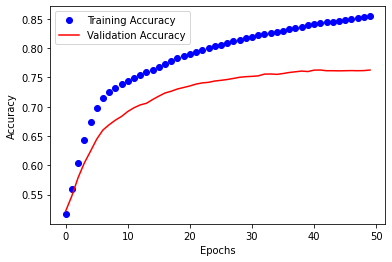

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(epochs) # 50 is the number of epochs
train_acc = history.history['acc']
valid_acc = history.history['val_acc']
print(train_acc)
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, valid_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
model.save('dense_imdb_model.h5')

Read Test data

In [0]:
import os
imdb_dir = './aclImdb'
test_dir = os.path.join(imdb_dir, 'test')
labels_test = []
texts_test = []
for label_type in ['pos', 'neg']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts_test.append(f.read())
      f.close()
      if label_type == 'neg':
        labels_test.append(0)
      else:
        labels_test.append(1)

In [21]:
print('Number of training samples: '+str(len(texts_test)))
print('Number of training labels: '+str(len(labels_test)))

Number of training samples: 25000
Number of training labels: 25000


Tokenize the text

In [0]:
sequences_test = tokenizer.texts_to_sequences(texts_test)

Padding

In [0]:
x_test = preprocessing.sequence.pad_sequences(sequences_test, maxlen=word_num)

Evaluate model

In [27]:
loss_and_acc = model.evaluate(x_test, np.array(labels_test))
print("loss = ",str(loss_and_acc[0]))
print("acc = ", str(loss_and_acc[1]))

782/782 [==============================] - 2s 2ms/step - loss: 0.4843 - acc: 0.7640
loss =  0.4843427240848541
acc =  0.7640399932861328
